# Import the libraries

In [297]:
import os
import sys
sys.path.append("../")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [298]:
# Load data

data = pd.read_csv('../data/raw/smoking_driking_dataset_Ver01.csv')

In [299]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,991346.0,47.614491,14.181339,20.0,35.0,45.0,60.0,85.0
height,991346.0,162.240625,9.282957,130.0,155.0,160.0,170.0,190.0
weight,991346.0,63.284050,12.514241,25.0,55.0,60.0,70.0,140.0
waistline,991346.0,81.233358,11.850323,8.0,74.1,81.0,87.8,999.0
sight_left,991346.0,0.980834,0.605949,0.1,0.7,1.0,1.2,9.9
sight_right,991346.0,0.978429,0.604774,0.1,0.7,1.0,1.2,9.9
hear_left,991346.0,1.031495,0.174650,1.0,1.0,1.0,1.0,2.0
hear_right,991346.0,1.030476,0.171892,1.0,1.0,1.0,1.0,2.0
SBP,991346.0,122.432498,14.543148,67.0,112.0,120.0,131.0,273.0
DBP,991346.0,76.052627,9.889365,32.0,70.0,76.0,82.0,185.0


In [300]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [301]:
#Rename columns

new_name = {
    'SBP': 'systolic_blood_pressure',
    'DBP': 'diastolic_blood_pressure',
    'BLDS': 'glucose_fasting',
    'tot_chole': 'total_cholesterol',
    'HDL_chole': 'HDL',
    'LDL_chole': 'LDL',
    'SGOT_AST': 'AST',
    'SGOT_ALT': 'ALT',
    'gamma_GTP': 'GGT',
    'DRK_YN': 'drinker',
}

data.rename(columns=new_name, inplace=True)

# Inconsistency data:
## Variables with inconsistent data:
- Waistline
- Sight_left
- Sight_right
- Glucose_Fasting
- Cholesterol
- HDL
- LDL
- Triglycerides
- Hemoglobin
- Serum_Creatinine
- GOT
- GPT
- GGT

In [302]:
# drop inconsistent data
data.drop(data[data['waistline'] >= 150].index, inplace=True)
data.drop(data[data['waistline'] == 8].index, inplace=True)
data.drop(data[data['sight_left'] > 2.0].index, inplace=True)
data.drop(data[data['sight_right'] > 2.0].index, inplace=True)
data.drop(data[data['glucose_fasting'] <= 40].index, inplace=True)
data.drop(data[~((data['HDL'] <= data['total_cholesterol']) & (data['LDL'] <= data['total_cholesterol']))].index, inplace=True)
data.drop(data[data['triglyceride'] >= 400].index, inplace=True)
data.drop(data[data['triglyceride'] <= 10].index, inplace=True)
data.drop(data[data['LDL'] >= 500].index, inplace=True)
data.drop(data[data['LDL'] <= 10].index, inplace=True)
data.drop(data[data['HDL'] >= 200].index, inplace=True)
data.drop(data[data['HDL'] <= 10].index, inplace=True)
data.drop(data[data['hemoglobin'] < 4].index, inplace=True)
data.drop(data[data['serum_creatinine'] > 10].index, inplace=True)
data.drop(data[data['AST'] < 3].index, inplace=True)
data.drop(data[data['AST'] > 500].index, inplace=True)
data.drop(data[data['ALT'] < 3].index, inplace=True)
data.drop(data[data['ALT'] > 500].index, inplace=True)
data.drop(data[data['GGT'] < 3].index, inplace=True)
data.drop(data[data['GGT'] > 500].index, inplace=True)

In [303]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,964033.0,47.570747,14.195637,20.0,35.0,45.0,60.0,85.0
height,964033.0,162.165455,9.277044,130.0,155.0,160.0,170.0,190.0
weight,964033.0,63.103639,12.436934,25.0,55.0,60.0,70.0,140.0
waistline,964033.0,81.027678,9.570925,27.0,74.0,81.0,87.0,149.1
sight_left,964033.0,0.952371,0.341245,0.1,0.7,1.0,1.2,2.0
sight_right,964033.0,0.949997,0.339704,0.1,0.7,1.0,1.2,2.0
hear_left,964033.0,1.031191,0.173833,1.0,1.0,1.0,1.0,2.0
hear_right,964033.0,1.030164,0.171038,1.0,1.0,1.0,1.0,2.0
systolic_blood_pressure,964033.0,122.253356,14.490308,70.0,112.0,120.0,131.0,273.0
diastolic_blood_pressure,964033.0,75.930930,9.845661,33.0,70.0,76.0,81.0,185.0


In [304]:
data.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'systolic_blood_pressure',
       'diastolic_blood_pressure', 'glucose_fasting', 'total_cholesterol',
       'HDL', 'LDL', 'triglyceride', 'hemoglobin', 'urine_protein',
       'serum_creatinine', 'AST', 'ALT', 'GGT', 'SMK_stat_type_cd', 'drinker'],
      dtype='object')

In [305]:
# One hot encoding to variables

data = pd.get_dummies(data, columns=['SMK_stat_type_cd'])
data = pd.get_dummies(data, columns=['sex'])


In [306]:
# transform drinker to binary

data['drinker'] = data['drinker'].apply(lambda x: 1 if x == 'Y' else 0)

In [307]:
# rename columns

new_name = {
    'SMK_stat_type_cd_1.0': 'never_smoked',
    'SMK_stat_type_cd_2.0': 'ex_smoker',
    'SMK_stat_type_cd_3.0': 'current_smoker',
}

data.rename(columns=new_name, inplace=True)

In [308]:
# transform boolean columns in int64

data['never_smoked'] = data['never_smoked'].astype('int64')
data['ex_smoker'] = data['ex_smoker'].astype('int64')
data['current_smoker'] = data['current_smoker'].astype('int64')
data['sex_Female'] = data['sex_Female'].astype('int64')
data['sex_Male'] = data['sex_Male'].astype('int64')

In [309]:
data.dtypes

age                           int64
height                        int64
weight                        int64
waistline                   float64
sight_left                  float64
sight_right                 float64
hear_left                   float64
hear_right                  float64
systolic_blood_pressure     float64
diastolic_blood_pressure    float64
glucose_fasting             float64
total_cholesterol           float64
HDL                         float64
LDL                         float64
triglyceride                float64
hemoglobin                  float64
urine_protein               float64
serum_creatinine            float64
AST                         float64
ALT                         float64
GGT                         float64
drinker                       int64
never_smoked                  int64
ex_smoker                     int64
current_smoker                int64
sex_Female                    int64
sex_Male                      int64
dtype: object

In [310]:
# Detect missing values
data.isna().sum()

age                         0
height                      0
weight                      0
waistline                   0
sight_left                  0
sight_right                 0
hear_left                   0
hear_right                  0
systolic_blood_pressure     0
diastolic_blood_pressure    0
glucose_fasting             0
total_cholesterol           0
HDL                         0
LDL                         0
triglyceride                0
hemoglobin                  0
urine_protein               0
serum_creatinine            0
AST                         0
ALT                         0
GGT                         0
drinker                     0
never_smoked                0
ex_smoker                   0
current_smoker              0
sex_Female                  0
sex_Male                    0
dtype: int64

In [311]:
# Detect duplicated values

data.duplicated().sum()

22

In [312]:
# Drop duplicated values

data.drop_duplicates(inplace=True)

In [313]:
# Verify if duplicated values were dropped
data.duplicated().sum()

0

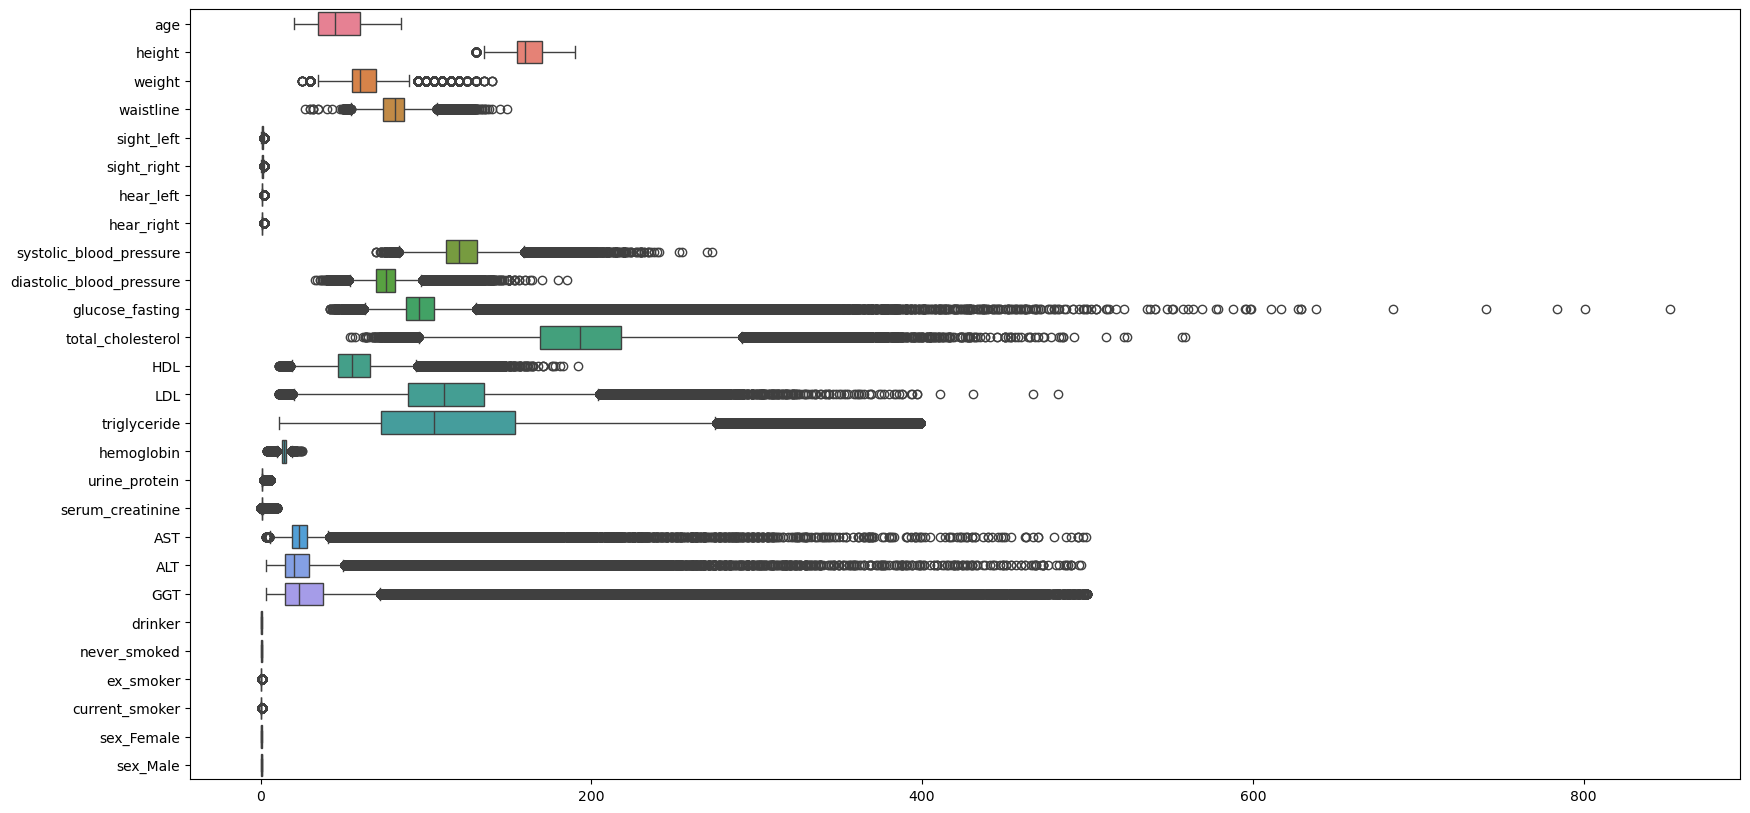

In [329]:
# detect outlier with boxplot

plt.figure(figsize=(20, 10))
sns.boxplot(data=data, orient='h')
plt.show()

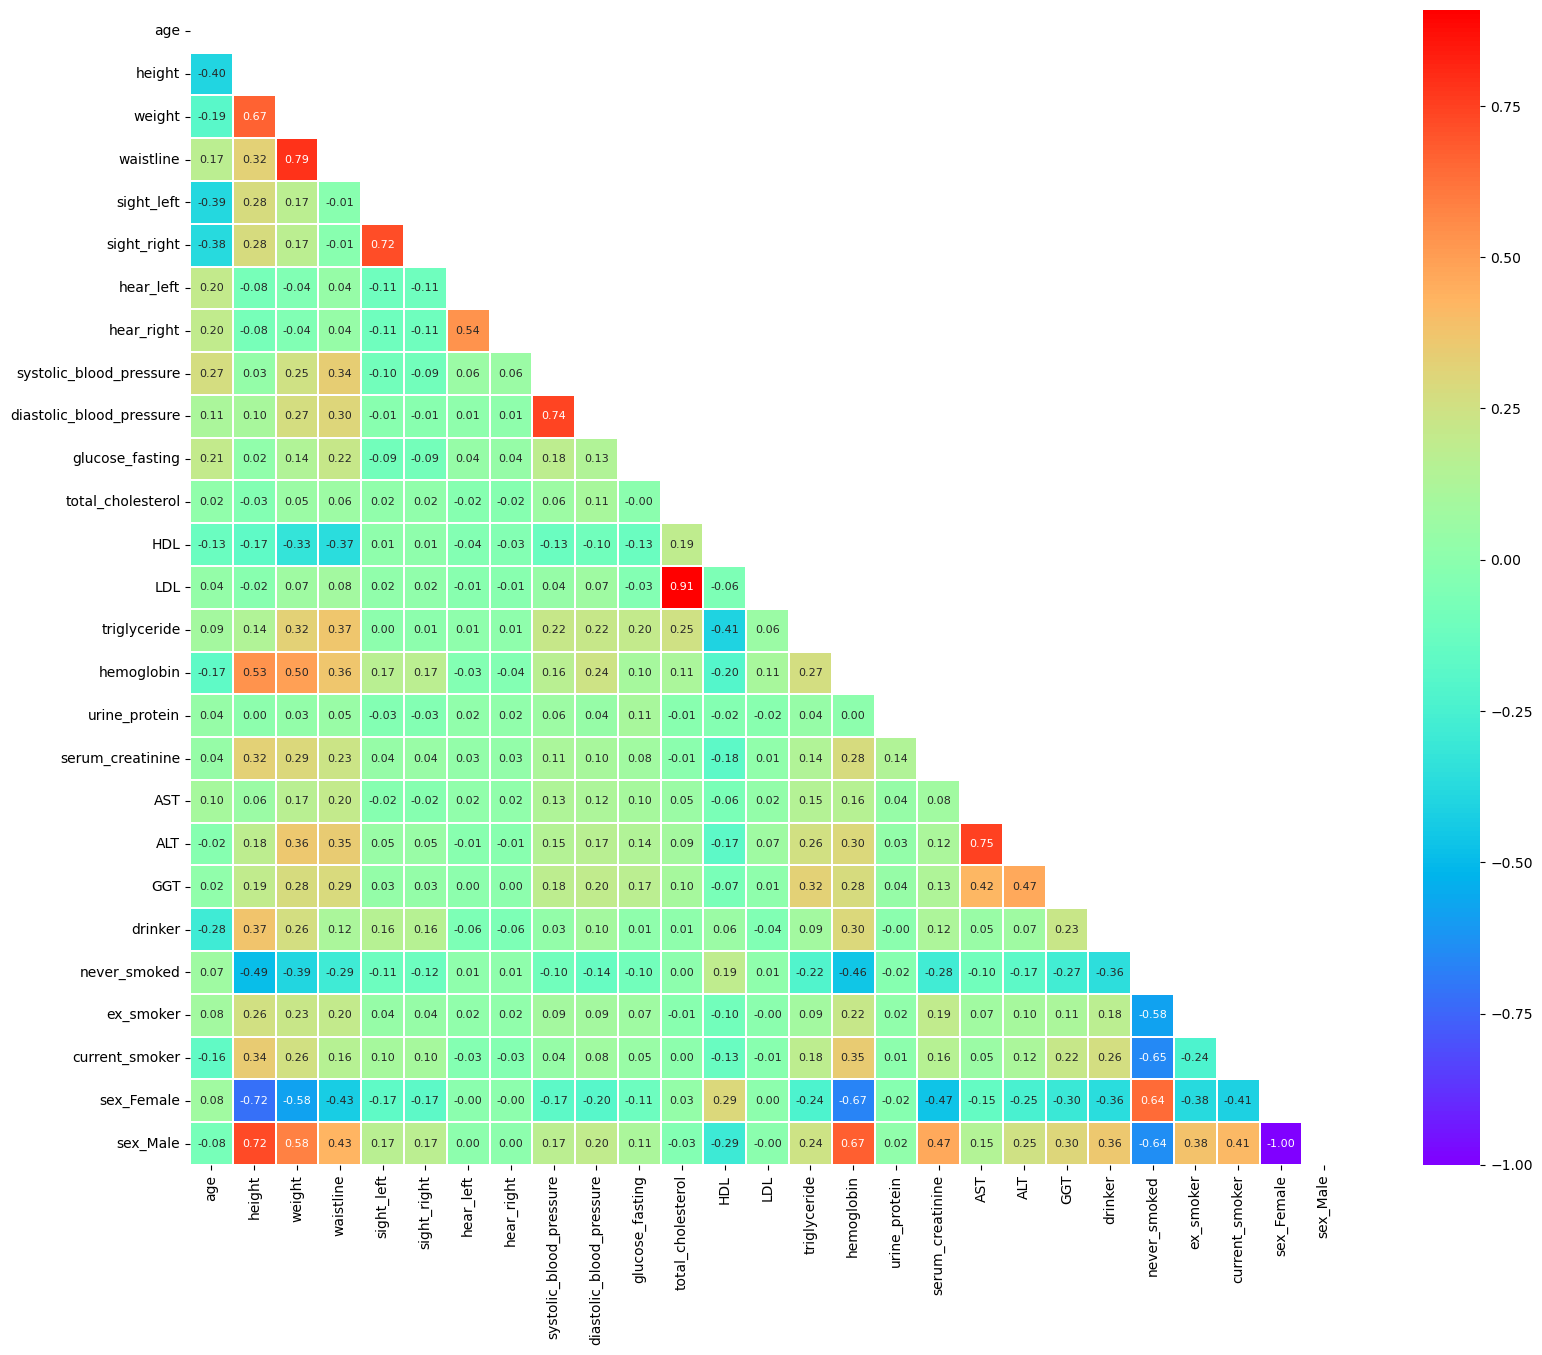

In [318]:
# correlation matrix and plot

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20, 15))
sns.heatmap(corr, cmap='rainbow', annot=True, fmt='.2f', linewidths=0.1, annot_kws={'size': 8}, square=True, mask=mask)

plt.show()

In [344]:
# use OLS to check p-values

import statsmodels.api as sm

X = data.drop(['sex_Male'], axis=1)
y = data['sex_Male']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               sex_Male   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.550e+32
Date:                Wed, 04 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:41:32   Log-Likelihood:             3.0457e+07
No. Observations:              964011   AIC:                        -6.091e+07
Df Residuals:                  963985   BIC:                        -6.091e+07
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.7500   1.46e-16   5.14e+15      0.000       0.750       0.750
age                      -2.517e-17   4.75e-19    -53.017      0.000   -2.61e-17   -2.42e-17
height                    4.182e-17   9.86e-19     42.421      0.000    3.99e-17    4.38e-17
weight                   -6.068e-17   9.28e-19    -65.373      0.000   -6.25e-17   -5.89e-17
waistline                 6.438e-17      1e-18     64.159      0.000    6.24e-17    6.63e-17
sight_left                3.407e-15   2.02e-17    168.605      0.000    3.37e-15    3.45e-15
sight_right              -7.419e-15   2.03e-17   -366.255      0.000   -7.46e-15   -7.38e-15
hear_left                -2.089e-15   3.21e-17    -64.998      0.000   -2.15e-15   -2.03e-15
hear_right                4.488e-15   3.26e-17    137.540      0.000    4.42e-15    4.55e-15
systolic_blood_pressure    1.51e-16   5.09e-19    296.631      0.000     1.5e-16    1.52e-16
diastolic_blood_pressure -1.961e-16   7.27e-19   -269.623      0.000   -1.98e-16   -1.95e-16
glucose_fasting          -1.744e-17   2.15e-19    -81.296      0.000   -1.79e-17    -1.7e-17
total_cholesterol         4.123e-17   1.69e-18     24.417      0.000    3.79e-17    4.45e-17
HDL                       2.103e-17   1.72e-18     12.199      0.000    1.77e-17    2.44e-17
LDL                       -3.35e-17   1.69e-18    -19.847      0.000   -3.68e-17   -3.02e-17
triglyceride              4.623e-18   3.42e-19     13.524      0.000    3.95e-18    5.29e-18
hemoglobin               -3.018e-16   4.26e-18    -70.904      0.000    -3.1e-16   -2.93e-16
urine_protein            -1.435e-16   1.11e-17    -12.938      0.000   -1.65e-16   -1.22e-16
serum_creatinine         -4.378e-16   2.13e-17    -20.521      0.000    -4.8e-16   -3.96e-16
AST                       2.462e-16   5.44e-19    452.699      0.000    2.45e-16    2.47e-16
ALT                      -2.576e-17   4.04e-19    -63.836      0.000   -2.66e-17    -2.5e-17
GGT                      -3.953e-17   1.52e-19   -259.923      0.000   -3.98e-17   -3.92e-17
drinker                   8.923e-17   1.09e-17      8.163      0.000    6.78e-17    1.11e-16
never_smoked                 0.2500    4.9e-17   5.11e+15      0.000       0.250       0.250
ex_smoker                    0.2500   4.97e-17   5.03e+15      0.000       0.250       0.250
current_smoker               0.2500   4.95e-17   5.05e+15      0.000       0.250       0.250
sex_Female                  -1.0000   1.92e-17   -5.2e+16      0.000      -1.000      -1.000
==============================================================================
Omnibus:                   667049.312   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         53519434.318
Skew:                          -2.607   Prob(JB):       